In [1]:
import cv2,os
data_path='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Knee project/Knee-Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Doubtful': 0, 'Mild': 1, 'Moderate': 2, 'Normal': 3, 'Severe': 4}
['Doubtful', 'Mild', 'Moderate', 'Normal', 'Severe']
[0, 1, 2, 3, 4]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
## Recale and assing catagorical Lables
import numpy as np
data=np.array(data)/255.0
data = np.reshape(data,(data.shape[0], img_size,img_size,1))
label= np.array(label)
from keras.utils import  np_utils
new_label = np_utils.to_categorical(label)

In [5]:
new_label.shape

(1650, 5)

In [6]:
## CNN Model

In [7]:
data.shape

(1650, 256, 256, 1)

In [8]:
data.shape[1:]

(256, 256, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(48,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 3rd convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 4th convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 5th convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [10]:
## Splitting data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data,new_label,test_size=0.3)

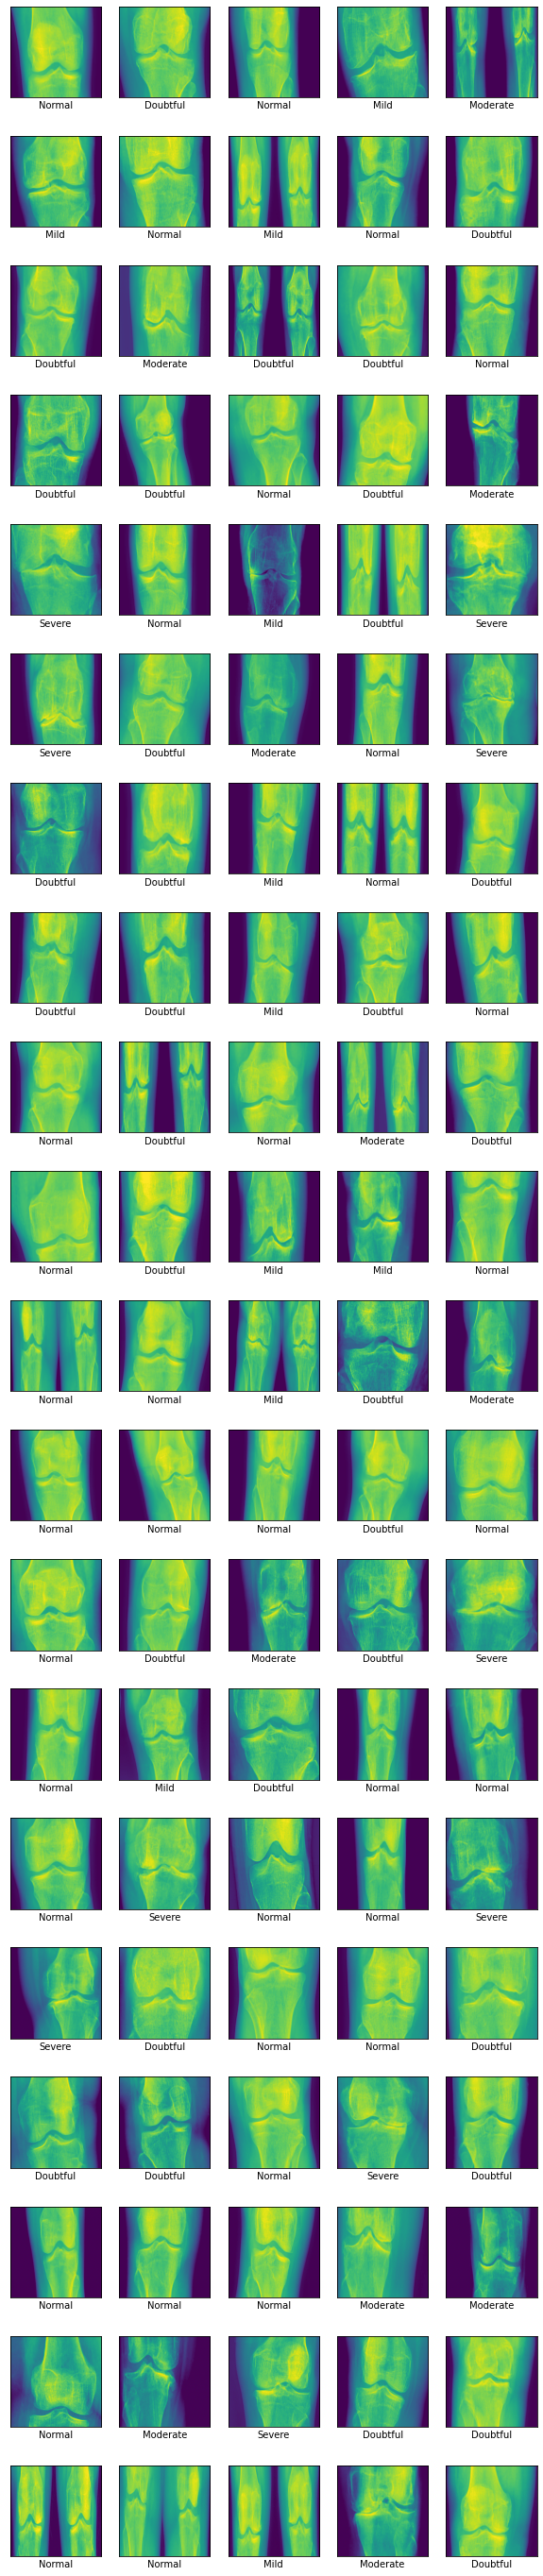

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,50))
for i in range(100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [14]:
history=model.fit(x_train,y_train,epochs=150,validation_split=0.3)

Epoch 1/150
26/26 [==============================] - 8s 312ms/step - loss: 1.3994 - accuracy: 0.3800 - val_loss: 1.5108 - val_accuracy: 0.3458
Epoch 2/150
26/26 [==============================] - 8s 313ms/step - loss: 1.3834 - accuracy: 0.3948 - val_loss: 1.4992 - val_accuracy: 0.3401
Epoch 3/150
26/26 [==============================] - 8s 311ms/step - loss: 1.3572 - accuracy: 0.4072 - val_loss: 1.5081 - val_accuracy: 0.3429
Epoch 4/150
26/26 [==============================] - 8s 309ms/step - loss: 1.3722 - accuracy: 0.3911 - val_loss: 1.5226 - val_accuracy: 0.3372
Epoch 5/150
26/26 [==============================] - 8s 310ms/step - loss: 1.3422 - accuracy: 0.4196 - val_loss: 1.4944 - val_accuracy: 0.3573
Epoch 6/150
26/26 [==============================] - 8s 309ms/step - loss: 1.3208 - accuracy: 0.4356 - val_loss: 1.4984 - val_accuracy: 0.3631
Epoch 7/150
26/26 [==============================] - 8s 310ms/step - loss: 1.3129 - accuracy: 0.4196 - val_loss: 1.4957 - val_accuracy: 0.3602

In [15]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Knee project/model.h5')

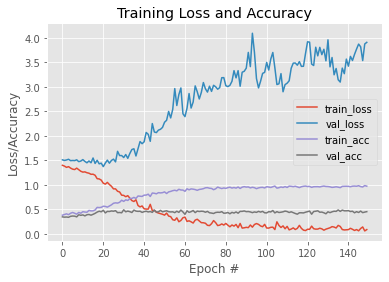

In [20]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 150 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [21]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 3.4380104541778564 %
test accuracy: 0.5070707201957703 %


A.I predicts: Mild
Correct prediction for label 1 is Mild


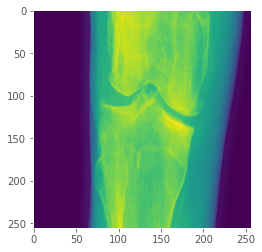

In [22]:
X = 32
img_size = 256
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

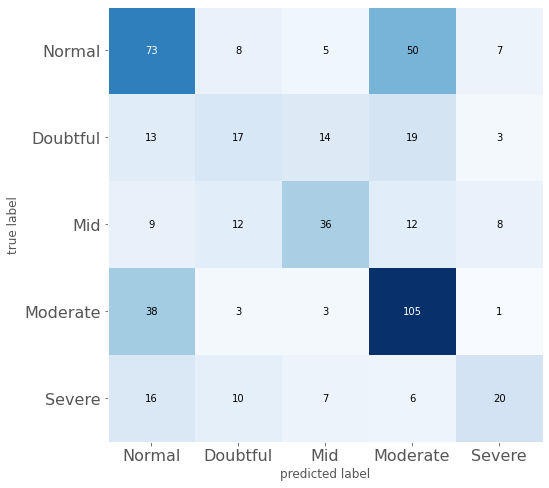

In [23]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()